# Introducing Some Other Interesting Plots

# Parallel Coordinates Plot in Python

![](figs/06_fig_01.png)

This type of visualisation is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them. For example, if you had to compare an array of products with the same attributes (comparing computer or car specs across different models)

In a Parallel Coordinates Plot, each variable is given an axis and all the axes are placed parallel to each other. Each axis can have a different scale, as each variable works off a different unit of measurement, or all the axes can be normalised to keep all the scales uniform. Values are plotted as a series of lines that are connected across all the axes. This means that each line is a collection of points placed on each axis, that have all been connected. 

The downside to Parallel Coordinates Plots, is that they can become over-cluttered and therefore, illegible when they're very data-dense. The best way to remedy this problem is through interactivity and a technique known as "brushing". Brushing highlights a selected line or collection of lines while fading out all the others. This allows you to isolate sections of the plot you're interested while filtering out the noise. 

![](figs/06_fig_02.png)

## Plotly

Plotly is an open-source graphing library and web-based interative visualisation tool. It allows users to create interactive plots and dashboards in Python, R, and JavaScript.

Plotly is a very good tool to make parallel coordinates plots. 

First, let's install Plotly using pip:

In [1]:
!pip install plotly

## Parallel Coordinates plot with Plotly Express

Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures. In a prallel coordinates plot with `px.parallel_coordinates`, each row of the DataFrame is represented by a polyline mark which traverses a set of parallel axes, one for each of the dimensions. For other representations of multivariate data, also see parallel categories, radar charts and scatterplot matrix (SPLOM).

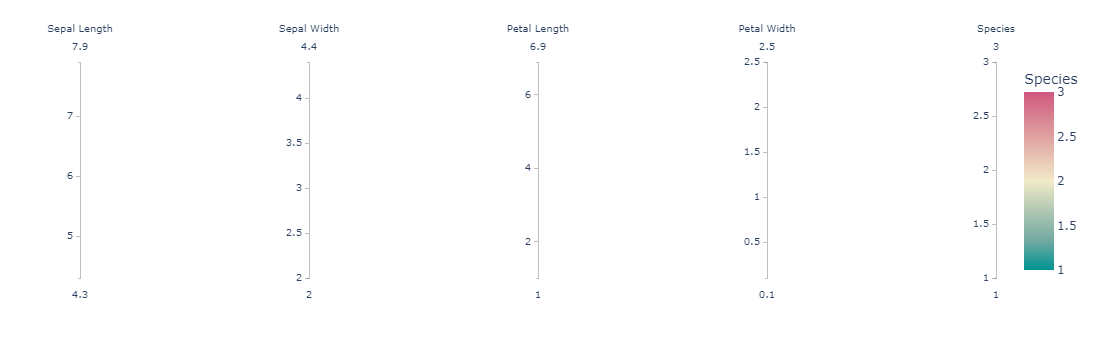

In [2]:
import plotly.express as px 
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", 
                              labels={
                                  "species_id": "Species",
                                  "sepal_width": "Sepal Width",
                                  "sepal_length": "Sepal Length",
                                  "petal_width": "Petal Width",
                                  "petal_length": "Petal Length"
                              }, 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

Parallel coordinates are richly interactive by default. Drag the lines along the axes to filter regions.

Select the columns to be represented with the dimensions parameter. 

In [3]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width', 'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

## Parallel Coordinates Chart with go.Parcoords

In [4]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Parcoords(
        line_color='red',
        dimensions=list([
            dict(range=[1,5], constraintrange=[1,2], label='A', values=[1,4]),
            dict(range=[1.5,5], tickvals=[1.5,3,4.5], label='B', values=[3,1.5]),
            dict(range=[1,5], tickvals=[1,2,4,5], label='C', values=[2,4], ticktext=['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range=[1,5], label='D', values=[4,2])
        ])
    )
)
fig.show()

Parallel coordinates are richly interactive by default. Drag the lines along the axes to filter regions and drag the axis names across the plot to rearrange variables.

## Basic Parallel Coordinates Plot

In [5]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/iris.csv")
fig = go.Figure(
    data=go.Parcoords(
        line=dict(color=df['species_id'], colorscale=[[0,'purple'], [0.5, 'lightseagreen'], [1, 'gold']]),
        dimensions=list([
            dict(range=[0,8], constraintrange=[4,8], label='Sepal Length', values=df['sepal_length']),
            dict(range=[0,8], label='Sepal Width', values=df['sepal_width']),
            dict(range=[0,8], label='Petal Length', values=df['petal_length']),
            dict(range=[0,8], label='Petal Width', values=df['petal_width'])
        ])
    )
)

fig.update_layout(paper_bgcolor='white')
fig.show()

## Advanced Parallel Coordinates Plot

In [6]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

fig = go.Figure(
    data=go.Parcoords(
        line=dict(color=df['colorVal'], colorscale='Electric', showscale=True, cmin=-4000, cmax=-100),
        dimensions=list([
            dict(range=[32000, 227900], constraintrange=[100000,150000], label="Block Height", values=df['blockHeight']),
            dict(range=[0, 700000], label='Block Width', values=df['blockWidth']),
            dict(tickvals=[0,0.5,1,2,3], ticktext=['A', 'AB', 'B', 'Y', 'Z'], label='Cyclinder Material', values=df['cycMaterial']),
            dict(range=[-1,4], tickvals=[0,1,2,3], label='Block Material', values=df['blockMaterial']),
            dict(range=[134, 3154], visible=True, label='Total Weight', values=df['totalWeight']),
            dict(range=[9, 19984], label='Assembly Penalty Wt', values=df['assemblyPW']),
            dict(range=[49000,568000], label='Height st Width', values=df['HstW'])
        ])
    )
)
fig.show()

# Parallel Categories Diagram in Python

## Parallel Categories Diagram

The parallel categories diagram (also known as parallel sets or alluvial diagram) is a visualisation of multi-dimensional categorical data sets. Each variable in the data set is represented by a column of rectangles, where each rectangle corresponds to a discrete value taken on by that variable. The relative heights of the rectangles reflect the relative frequency of occurrence of the corresponding value. 

Combinations of category rectangles across dimensions are connected by ribbons, where the height of the ribbon corresponds to the relative frequency of occurrence of the combination of categories in the data set. 

## Basic Parallel Category Diagram with plotly.express

This example visualises the restaurant bills of a sample of 244 people. Hovering over a category rectangle (sex, smoker, etc) displays a tooltip with the number of people with that single trait. Hovering over a ribbon in the diagram displays a tooltip with the number of people with a particular combination of the five traits connected by the ribbon. 

By default, `px.parallel_categories` will display any column in the `data_frame` that has a cardinality (or number of unique values) of less than 50. This can be overridden either by passing in a specific list of columns to `dimensions` or by setting `dimensions_max_cardinality` to something other than 50.

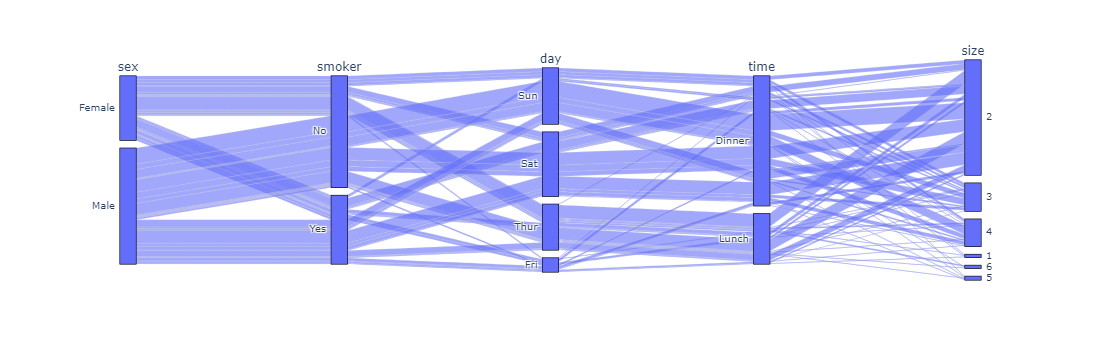

In [7]:
import plotly.express as px

df = px.data.tips()
fig = px.parallel_categories(df)

fig.show()

## Style Diagram

In this example `dimensions` represents a list of strings or the columns of data frame, and `labels` is a dictionary with string keys (column name) and string values ('desired lable to be displayed').

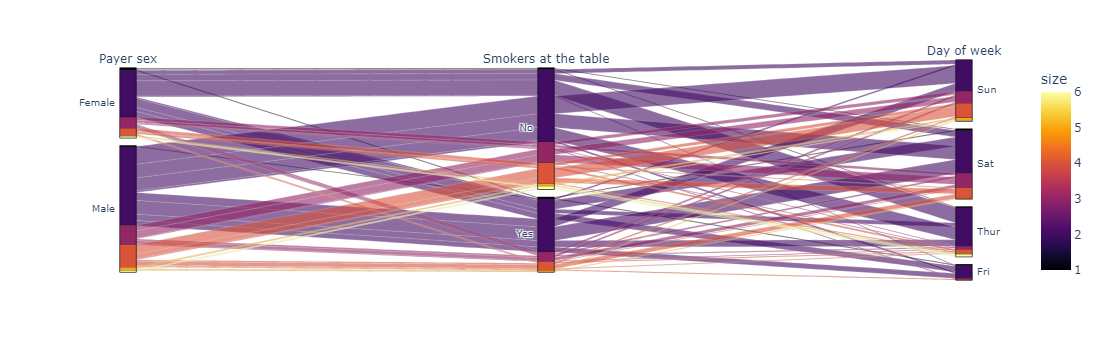

In [8]:
import plotly.express as px

df = px.data.tips()
fig = px.parallel_categories(df, dimensions=['sex', 'smoker', 'day'],
                             color='size', color_continuous_scale=px.colors.sequential.Inferno,
                             labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'})
fig.show()

## Basic Paralle Categories Diagram with `graph_objects`

This example illustrates the hair color, eye color, and sex of a sample of 8 people. The dimension labels can be dragged horizontally to reorder the dimensions and the category rectangles can be dragged vertically to reorder the categories within a dimension. 

In [9]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Parcats(
        dimensions=[
            {'label':'Hair', 'values':['Black','Black','Black','Brown','Brown','Brown','Red','Brown']},
            {'label':'Eye', 'values':['Brown','Brown','Brown','Brown','Brown','Blue','Blue','Blue']},
            {'label':'Sex', 'values':['Female','Female','Female','Male','Female','Male','Male','Male']}
        ]
    )
)

fig.show()

## Basic Parallel Categories Diagram with Counts

If the frequency of occurrence for each combination of attributes is known in advance, this can be specified using the `counts` property.

In [10]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Parcats(
        dimensions=[
            {'label':'Hair', 'values':['Black', 'Brown','Brown','Brown','Red']},
            {'label':'Eye', 'values':['Brown','Brown','Brown','Blue', 'Blue']},
            {'label':'Sex', 'values':['Female', 'Male', 'Female', 'Male', 'Male']},
        ],
        counts=[6,10,40,23,7]
    )
)
fig.show()

## Multi-Color Parallel Categories Diagram

The color of the ribbons can be specified with the `line.color` property. Similar to other trace types, this property may be set to an array of numbers, which are then mapped to colors according to the colorscale specified in the `line.colorscale` property.

Here is an example of visualising the survival rate of passengers in the titanic dataset, where the ribbons are colored based on survival outcome. 

By setting the hoveron property to `color` and the `hoverinfo` property to `count+probability` the tooltips now display count and probability information for each color (survival outcome) per category. 

By setting the `arrangement` property to `freeform` it is now possible to drag categories horizontally to reorder dimensions as well as vertically to reorder categories within the dimension. 

In [11]:
import plotly.graph_objects as go
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

# Create dimensions
class_dim = go.parcats.Dimension(values=titanic_df.Pclass, categoryorder='category ascending', label="Class")
gender_dim = go.parcats.Dimension(values=titanic_df.Sex, label="Gender")
survival_dim = go.parcats.Dimension(values=titanic_df.Survived, label="Outcome", categoryarray=[0,1], 
                                    ticktext=['perished', 'survived'])

# Create parcats trace
color = titanic_df.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']]

fig = go.Figure(
    data = [go.Parcats(
        dimensions=[class_dim, gender_dim, survival_dim],
        line={'color':color, 'colorscale':colorscale},
        hoveron='color', 
        hoverinfo='count+probability',
        labelfont={'size':18, 'family': 'Times'},
        tickfont={'size':16, 'family': 'Times'},
        arrangement='freeform'
    )]
)
fig.show()

## Parallel Categories Linked Brushing

This example demonstrates how the `on_selection` and `on_click` callbacks can be used to implement linked brushing between 3 categorical dimensions displayed with a `parcats` trace and 2 continuous dimensions displayed with a `scatter` trace. 

This example also sets the `line.shape` property to `hspline` to cause the ribbons to curve between categories. 

__Note:__ In order for the callback functions to be executed the figure must be a `FigureWidget`, and the figure should display itself. 

In [12]:
import plotly.graph_objects as go 
from ipywidgets import widgets
import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type']
dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale 
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0,'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=cars_df.horsepower, y=cars_df['highway-mpg'],
                     marker={'color':'gray'},mode='markers', selected={'marker':{'color': 'firebrick'}},
                     unselected={'marker':{'opacity': .3}}),
          go.Parcats(domain={'y':[0, 0.4]}, dimensions=dimensions, 
                     line={'colorscale': colorscale, 'cmin':0, 'cmax':1, 'color':color, 'shape':'hspline'})]
)

fig.update_layout(
    height=800, xaxis={'title': 'Horsepower'}, yaxis={'title': 'MPG', 'domain': [0.6,1]},
    dragmode='lasso', hovermode='closest'
)

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds
    # Update parcats colors 
    new_color = np.zeros(len(cars_df), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color 

# Register callback on scatter selection 
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'selected': {'marker': {'color': 'firebrick'}},
              'type': 'scatter',
              'uid': '56b82f58-b606-4cae-a758-6d8c6b1a04e8',
              'unselected': {'marker': {'opacity': 0.3}},
              'x': array([111., 111., 154., ..., 134., 106., 114.]),
              'y': array([27, 27, 26, ..., 23, 27, 25])},
             {'dimensions': [{'label': 'body-style',
                              'values': array(['convertible', 'convertible', 'hatchback', ..., 'sedan', 'sedan',
                                               'sedan'], dtype=object)},
                             {'label': 'drive-wheels',
                              'values': array(['rwd', 'rwd', 'rwd', ..., 'rwd', 'rwd', 'rwd'], dtype=object)},
                             {'label': 'fuel-type',
                              'values': array(['gas', 'gas', 'gas', ..., 'gas', 'diesel', 'gas'], dtype=object)

## Parallel Categories with Multi-Color Linked Brushing

This example extends the previous example to support brushing with multiple colors. The toggle buttons above may be used to select the active color, and this color will be applied when points are selected in the `scatter` trace and when categories or ribbons are clicked in the `parcats` trace. 

In [13]:
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type']
dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0,'gray'], [0.33,'gray'], [0.33,'firebrick'], [0.66,'firebrick'], [0.66,'blue'], [1.0,'blue']]
cmin = -0.5
cmax = 2.5

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[
        go.Scatter(
        x=cars_df.horsepower, y=cars_df['highway-mpg'],
        marker={'color':color, 'cmin':cmin, 'cmax':cmax, 'colorscale':colorscale, 'showscale':True,
                'colorbar':{'tickvals':[0,1,2], 'ticktext':['None', 'Red', 'Blue']}},
        mode='markers'
    ),
        go.Parcats(
            domain={'y':[0,0.4]}, dimensions=dimensions, 
            line={'colorscale':colorscale, 'cmin':cmin, 'cmax':cmax, 'color':color, 'shape':'hspline'}
        )
    ]
)

fig.update_layout(height=800, xaxis={'title':'Horsepower'}, yaxis={'title':'MPG', 'domain':[0.6,1]}, dragmode='lasso', hovermode='closest')

# Build color selection widget
color_toggle = widgets.ToggleButtons(options=['None', 'Red', 'Blue'], index=1, description='Brush Color', 
                                     disabled=False)

# Update color callback
def update_color(trace, points, state):
    # Compute new color array
    new_color = np.array(fig.data[0].marker.color)
    new_color[points.point_inds] = color_toggle.index
    with fig.batch_update():
        # Update scatter color
        fig.data[0].marker.color = new_color
        # Update parcats colors
        fig.data[1].line.color = new_color

# Register callback on scatter selection
fig.data[0].on_selection(update_color)
# and parcats click 
fig.data[1].on_click(update_color)

# Display figure
widgets.VBox([color_toggle, fig])

# Sankey Diagram in Python

A Sankey diagram is a flow diagram, in which the width of arrows is proportional to the flow quantity.

## Basic Sankey Diagram

Sankey diagrams visualise the contributions to a flow by defining source to represent the source node, target for the target node, value to set the flow volume, and label that shows the node name. 

In [14]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), 
                      label=["A1", "A2", "B1", "B2", "C1", "C2"], color="blue"),
            link=dict(source=[0,1,0,2,3,3], target=[2,3,3,4,4,5], value=[8,4,2,8,4,2])
        )
    ]
)

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

## More Complex Sankey Diagram with Colored Links

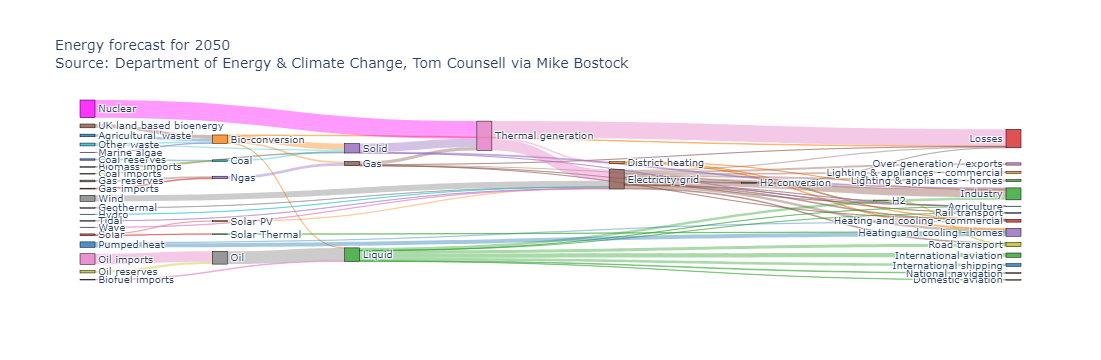

In [15]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# Override gray link colors with 'source' colors
opacity = 0.4
# Change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255,0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity)) for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat=".0f", valuesuffix="TWh",
    # Define nodes
    node=dict(pad=15, thickness=15, line=dict(color="black", width=0.5), label=data['data'][0]['node']['label'], color=data['data'][0]['node']['color']),
    # Add links
    link=dict(source=data['data'][0]['link']['source'], 
              target=data['data'][0]['link']['target'],
              value=data['data'][0]['link']['value'],
              label=data['data'][0]['link']['label'],
              color=data['data'][0]['link']['color'])
)])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

# Bubble Maps in Python

https://plotly.com/python/bubble-maps/

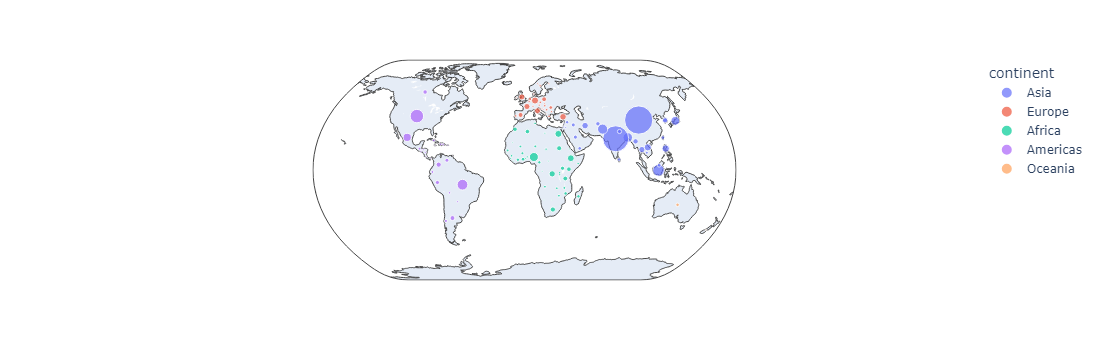

In [16]:
import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()

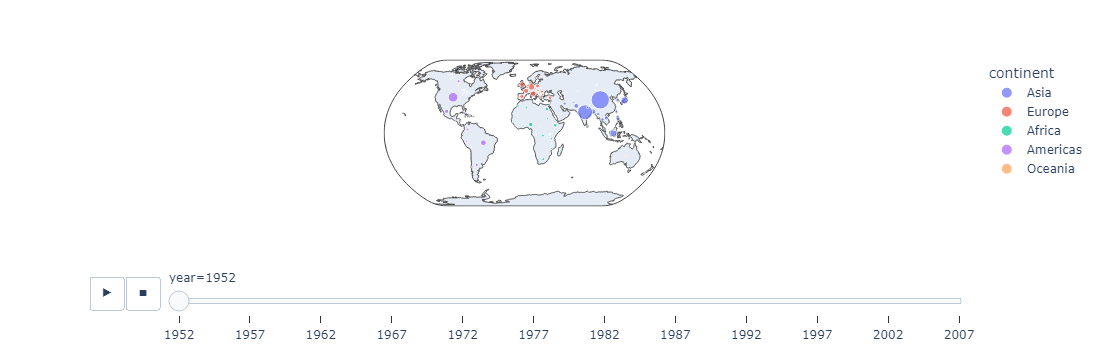

In [17]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

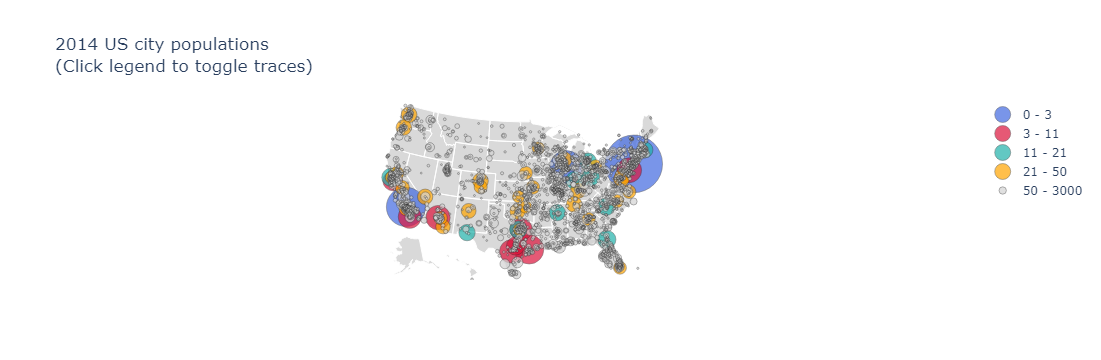

In [18]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,3),(3,11),(11,21),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# More about Plotly

https://plotly.com/python/ 

In [19]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

# References

* [Parallel Coordinates Plot](https://datavizcatalogue.com/methods/parallel_coordinates.html)
* [Parallel Coordinates Plot in Python](https://plotly.com/python/parallel-coordinates-plot/)
* [Parallel Categories Diagram in Python](https://plotly.com/python/parallel-categories-diagram/)
* [Sankey Diagram in Python](https://plotly.com/python/sankey-diagram/)